<a href="https://colab.research.google.com/github/chaitanyawargand/LInear_Regression_Model/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import copy
import math

In [417]:
# Load train table data
df=pd.read_csv('train.csv')

In [418]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [419]:
#description of train data
df.shape

(1460, 81)

In [420]:
X_train=df.drop(['SalePrice','Id'],axis=1)
y_train=np.log1p(df['SalePrice'].values)

In [421]:
def preprocess_data(df_input):
    df = df_input.copy()
    if 'MSSubClass' in df.columns:
        df['MSSubClass'] = df['MSSubClass'].astype(str)
    qual_map    = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
    exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
    fin_map      = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
    slope_map    = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
    shape_map    = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
    util_map     = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
    paved_map    = {'Y': 3, 'P': 2, 'N': 1}
    garage_map   = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
    fence_map    = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
    central_map  = {'Y': 1, 'N': 0}
    qual_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
                 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
    for col in qual_cols:
        if col in df.columns:
            df[col] = df[col].map(qual_map).fillna(0)

    mappings = {
        'BsmtExposure': exposure_map, 'BsmtFinType1': fin_map, 'BsmtFinType2': fin_map,
        'LandSlope': slope_map, 'LotShape': shape_map, 'Utilities': util_map,
        'PavedDrive': paved_map, 'GarageFinish': garage_map, 'Fence': fence_map,
        'CentralAir': central_map
    }
    for col, m in mappings.items():
        if col in df.columns:
            df[col] = df[col].map(m).fillna(0)

    # 6. ONE-HOT ENCODING for remaining categorical text
    df = pd.get_dummies(df, drop_first=True)

    return df


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5,
        77.5, 78.5, 79.5, 80.5]),
 [Text(0.5, 0, 'Id'),
  Text(1.5, 0, 'MSSubClass'),
  Text(2.5, 0, 'MSZoning'),
  Text(3.5, 0, 'LotFrontage'),
  Text(4.5, 0, 'LotArea'),
  Text(5.5, 0, 'Street'),
  Text(6.5, 0, 'Alley'),
  Text(7.5, 0, 'LotShape'),
  Text(8.5, 0, 'LandContour'),
  Text(9.5, 0, 'Utilities'),
  Text(10.5, 0, 'LotConfig'),
  Text(11.5, 0, 'LandSlope'),
  Text(12.5, 0, 'Neighborhood'),
  Text(13.5, 0, 'Condition1'),
  Text(14.5, 0, 'Condition2'),
  Text(15.5, 0, 

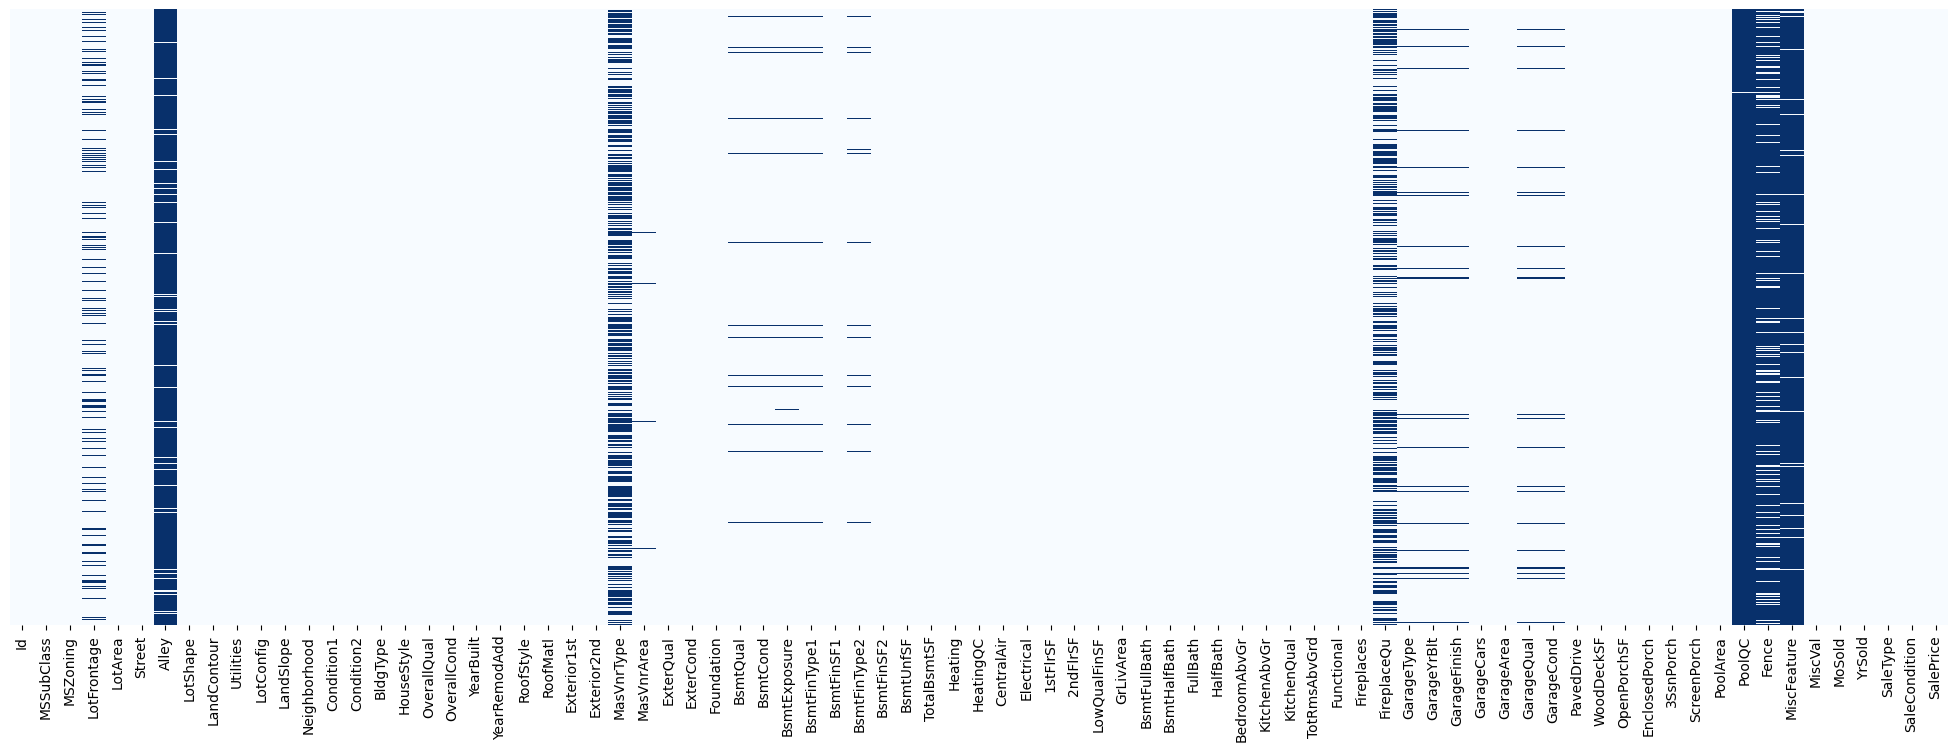

In [422]:
X_train=preprocess_data(X_train)
plt.figure(figsize=(25,8))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False, yticklabels=False,xticklabels=df.columns)
plt.xticks(rotation=90)


In [423]:
#iterative imputer
imputer=IterativeImputer(max_iter=10,random_state=18)
X_imputed=imputer.fit_transform(X_train)
x_imputed_table=pd.DataFrame(X_imputed,columns=X_train.columns)
x_imputed_table.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,4.0,4.0,3.0,7.0,5.0,2003.0,2003.0,196.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600.0,4.0,4.0,3.0,6.0,8.0,1976.0,1976.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,3.0,4.0,3.0,7.0,5.0,2001.0,2002.0,162.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,3.0,4.0,3.0,7.0,5.0,1915.0,1970.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,3.0,4.0,3.0,8.0,5.0,2000.0,2000.0,350.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [424]:
#z-score normalization
scaler=StandardScaler()
X_train=scaler.fit_transform(X_imputed)

In [425]:
print(f"--- Data Preparation Complete ---")
print(f"Final Features: {X_train.shape[1]}")
print(f"Final Samples: {X_train.shape[0]}")

--- Data Preparation Complete ---
Final Features: 216
Final Samples: 1460


In [426]:
X_train

array([[-0.24767597, -0.20714171,  0.70129102, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.38673377, -0.09188637,  0.70129102, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.12079402,  0.07347998, -1.01663664, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [-0.20538198, -0.14781027,  0.70129102, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.12079402, -0.08016039,  0.70129102, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.17526386, -0.05811155,  0.70129102, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [427]:
#multiple Linear regression
w_init=np.zeros(X_train.shape[1])
b_init=0

In [428]:
#compute cost
def compute_cost(X,y,w,b):
  m=X.shape[0]
  f_wb=np.dot(X,w)+b
  err=f_wb-y
  cost=np.sum(err**2)/(2*m)
  return cost

In [429]:
cost=compute_cost(X_train,y_train,w_init,b_init)
print(cost)


72.36870333538452


In [430]:
def comupte_gradient(X,y,w,b):
  m=X.shape[0]
  err=np.dot(X,w)+b-y
  dj_dw=np.dot(X.T,err)/m
  dj_db=np.sum(err)/m
  return dj_dw,dj_db


In [431]:
def gradient_descent(X,y,w_in,b_in,alpha,num_iters):
  J_history=[]
  w=copy.deepcopy(w_in)
  b=b_in
  for i in range(num_iters):
    dj_dw,dj_db=comupte_gradient(X,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    J_history.append(compute_cost(X,y,w,b))
    if i% math.ceil(num_iters / 10) == 0:
      print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

  return w,b,J_history

In [432]:
iteration=1000
alpha=1.0e-1
w_final,b_final,j_hist=gradient_descent(X_train,y_train,w_init,b_init,alpha,iteration)

Iteration    0: Cost    58.59   
Iteration  100: Cost     0.01   
Iteration  200: Cost     0.01   
Iteration  300: Cost     0.01   
Iteration  400: Cost     0.01   
Iteration  500: Cost     0.01   
Iteration  600: Cost     0.01   
Iteration  700: Cost     0.01   
Iteration  800: Cost     0.01   
Iteration  900: Cost     0.00   


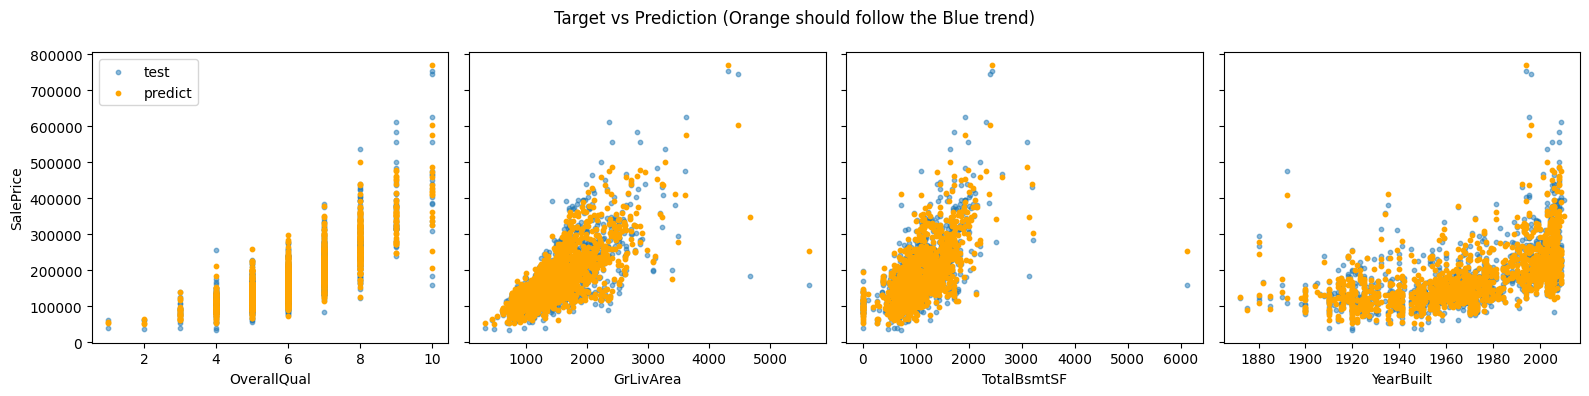

In [433]:
#testing prediction by graph
yp=np.expm1(np.dot(X_train,w_final)+b_final)
feature_names = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
fig,ax=plt.subplots(1,4,figsize=(16,4),sharey=True)
for i,col_name in enumerate(feature_names):
  # Plot y_train after inverse log transformation to compare with predictions on original scale
  ax[i].scatter(x_imputed_table[col_name],np.expm1(y_train),alpha=0.5,label='test',s=10)
  ax[i].scatter(x_imputed_table[col_name],yp,color='orange',label='predict',s=10)
  ax[i].set_xlabel(feature_names[i])
  if i==0:
    ax[i].set_ylabel('SalePrice')
    ax[i].legend()

fig.suptitle("Target vs Prediction (Orange should follow the Blue trend)")
plt.tight_layout()
plt.show()

In [434]:
#test
test_df=pd.read_csv('test.csv')
test_ids=test_df['Id']
X_test=test_df.drop(['Id'],axis=1)
X_test_processed =preprocess_data(X_test)
train_cols = x_imputed_table.columns
missing_cols_in_test = set(train_cols) - set(X_test_processed.columns)
for c in missing_cols_in_test:
    X_test_processed[c] = 0
extra_cols_in_test = set(X_test_processed.columns) - set(train_cols)
if len(extra_cols_in_test) > 0:
    X_test_processed = X_test_processed.drop(columns=list(extra_cols_in_test))
#very importand for processing and scaling test have same col order as train
X_test_aligned = X_test_processed[train_cols]
X_imputed_test = imputer.transform(X_test_aligned)
X_test_scaled = scaler.transform(X_imputed_test)
x_imputed_test_table = pd.DataFrame(X_imputed_test, columns=train_cols)
x_imputed_test_table.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622.0,4.0,4.0,3.0,5.0,6.0,1961.0,1961.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,81.0,14267.0,3.0,4.0,3.0,6.0,6.0,1958.0,1958.0,108.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,74.0,13830.0,3.0,4.0,3.0,5.0,5.0,1997.0,1998.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,78.0,9978.0,3.0,4.0,3.0,6.0,6.0,1998.0,1998.0,20.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,43.0,5005.0,3.0,4.0,3.0,8.0,5.0,1992.0,1992.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [435]:
y_test_predictions = np.expm1(np.dot(X_test_scaled, w_final) + b_final)
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": y_test_predictions
})
submission = submission.sort_values('Id')
submission.to_csv('submission.csv', index=False)

In [436]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>